<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - SOL</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_SOL.csv')
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
1822,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
1823,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
1824,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   SOL-USD_ADJCLOSE  746 non-null    float64
 2   SOL-USD_CLOSE     746 non-null    float64
 3   SOL-USD_HIGH      746 non-null    float64
 4   SOL-USD_LOW       746 non-null    float64
 5   SOL-USD_OPEN      746 non-null    float64
 6   SOL-USD_VOLUME    746 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
SOL-USD_ADJCLOSE,1080
SOL-USD_CLOSE,1080
SOL-USD_HIGH,1080
SOL-USD_LOW,1080
SOL-USD_OPEN,1080
SOL-USD_VOLUME,1080


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SOL-USD_ADJCLOSE,746.0,5.650049e+01,6.889538e+01,0.515273,2.122762e+00,2.673679e+01,1.005615e+02,2.589343e+02
SOL-USD_CLOSE,746.0,5.650049e+01,6.889538e+01,0.515273,2.122762e+00,2.673679e+01,1.005615e+02,2.589343e+02
SOL-USD_HIGH,746.0,5.920374e+01,7.185546e+01,0.559759,2.252829e+00,2.823814e+01,1.034098e+02,2.600621e+02
SOL-USD_LOW,746.0,5.362986e+01,6.575030e+01,0.505194,1.979515e+00,2.531964e+01,9.551391e+01,2.461224e+02
SOL-USD_OPEN,746.0,5.640108e+01,6.897131e+01,0.513391,2.115551e+00,2.666828e+01,1.002374e+02,2.587816e+02
SOL-USD_VOLUME,746.0,1.104108e+09,1.658926e+09,652020.000000,1.290409e+07,3.182848e+08,1.867557e+09,1.706864e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
866,2019-09-09,NaN,NaN,NaN,NaN,NaN,NaN
512,2018-09-20,NaN,NaN,NaN,NaN,NaN,NaN
203,2017-11-15,NaN,NaN,NaN,NaN,NaN,NaN
979,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
286,2018-02-06,NaN,NaN,NaN,NaN,NaN,NaN
255,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN
891,2019-10-04,NaN,NaN,NaN,NaN,NaN,NaN
977,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN
1665,2021-11-16,219.239029,219.239029,238.497147,215.442093,238.497147,3.557977e+09
788,2019-06-23,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1075,2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN
1076,2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN
1077,2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN
1078,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,87364276.0,12.517581,89.212284
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,43862444.0,22.429290,37.130136
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,38736897.0,10.998101,25.477091
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,18211285.0,14.518307,15.197753
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,16747614.0,17.510587,26.792633


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

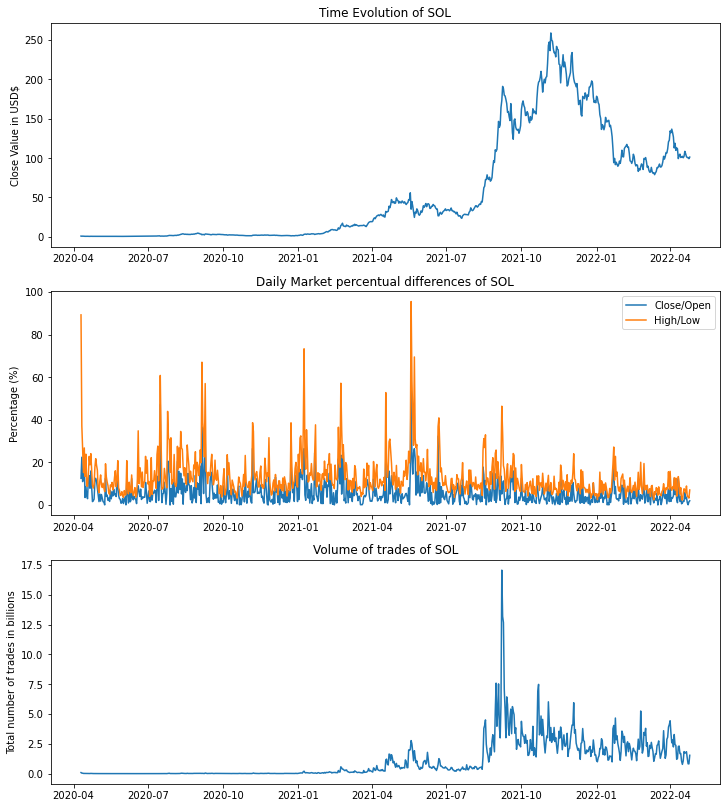

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
570,2021-11-01,203.545090,203.545090,211.360840,198.238968,202.629211,3.157613e+09,0.449963,6.619219
571,2021-11-02,220.239594,220.239594,222.233032,201.180389,203.517914,3.020087e+09,7.592495,10.464560
572,2021-11-03,242.898819,242.898819,246.321533,216.196198,221.076752,6.024951e+09,8.984015,13.934258
573,2021-11-04,247.387772,247.387772,250.466339,235.150879,243.097809,4.440296e+09,1.734105,6.513035
574,2021-11-05,236.474335,236.474335,248.383911,231.160812,247.270935,2.752871e+09,4.565654,7.450700
...,...,...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09,3.656589,8.929673
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09,1.138403,3.935267
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08,0.123736,4.038873
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08,1.502879,3.240295


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,247.387772,242.898819,220.239594,203.545090,236.474335,2021-11-05
1,236.474335,247.387772,242.898819,220.239594,258.934326,2021-11-06
2,258.934326,236.474335,247.387772,242.898819,249.823486,2021-11-07
3,249.823486,258.934326,236.474335,247.387772,248.467178,2021-11-08
4,248.467178,249.823486,258.934326,236.474335,239.213135,2021-11-09
...,...,...,...,...,...,...
167,105.497002,108.582031,102.158531,100.409698,101.776138,2022-04-21
168,101.776138,105.497002,108.582031,102.158531,100.612053,2022-04-22
169,100.612053,101.776138,105.497002,108.582031,100.744438,2022-04-23
170,100.744438,100.612053,101.776138,105.497002,99.235794,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((172,), (172, 4, 1), (172,))

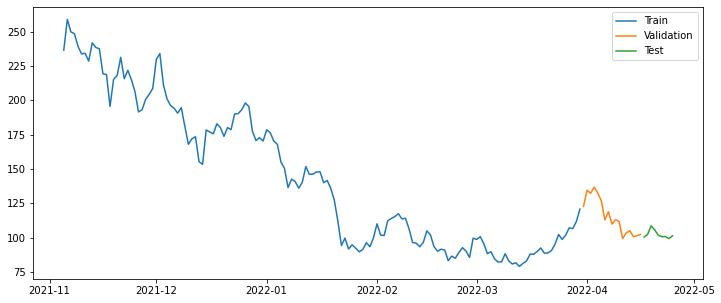

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .85)
q_90 = int(len(dates) * .95)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [20]:
#import os
#os.environ['PYTHONHASHSEED']= '0'
#import numpy as np
#np.random.seed(1)
#import random as rn
#rn.seed(1)
#import tensorflow as tf
#tf.random.set_seed(1)
#
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras import layers
#from sklearn.metrics import mean_squared_error
#
## Function to create LSTM model and compute the MSE value for the given parameters
#def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
#    
#    # create model
#    model = Sequential([layers.Input((4, 1)),
#                        layers.LSTM(64),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(32, activation='relu'),
#                        layers.Dense(1)])
#    # Compile model
#    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
#    
#    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
#    
#    test_predictions = model.predict(X_test).flatten()
#    
#    LSTM_mse = mean_squared_error(y_test, test_predictions)
#    
#    return LSTM_mse
#
##Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
#def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
#    
#    best_score = float('inf')
#    
#    for b in batch_size:
#        for e in epochs:
#            for l in learn_rate:
#                print('Batch Size: ' + str(b))
#                print('Number of Epochs: ' + str(e))
#                print('Value of Learning Rate: ' + str(l))
#                try:
#                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                    print('MSE=%.3f' % (mse))
#                    if mse < best_score:
#                        best_score = mse
#                        top_params = [b, e, l]
#                except:
#                    continue
#                    
#    print('Best MSE=%.3f' % (best_score))
#    print('Optimal Batch Size: ' + str(top_params[0]))
#    print('Optimal Number of Epochs: ' + str(top_params[1]))
#    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
#                        
#
## define parameters
#batch_size = [10, 100, 1000]
#epochs = [50, 100]
#learn_rate = np.linspace(0.001,0.1, num=10)
#
#warnings.filterwarnings("ignore")
#search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [21]:
#BEST SOLUTION OF THE MODEL

# MSE=21.605
# Batch Size: 10
# Number of Epochs: 100
# Value of Learning Rate: 0.001
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error


model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

Epoch 1/100
15/15 - 1s - loss: 23566.4023 - mean_absolute_error: 144.0411 - val_loss: 13205.5898 - val_mean_absolute_error: 114.2114 - 1s/epoch - 99ms/step
Epoch 2/100
15/15 - 0s - loss: 23151.0684 - mean_absolute_error: 142.5013 - val_loss: 12722.3330 - val_mean_absolute_error: 112.0753 - 50ms/epoch - 3ms/step
Epoch 3/100
15/15 - 0s - loss: 22366.3867 - mean_absolute_error: 139.4949 - val_loss: 11798.2041 - val_mean_absolute_error: 107.8746 - 48ms/epoch - 3ms/step
Epoch 4/100
15/15 - 0s - loss: 20959.7852 - mean_absolute_error: 134.1416 - val_loss: 10410.0117 - val_mean_absolute_error: 101.2327 - 46ms/epoch - 3ms/step
Epoch 5/100
15/15 - 0s - loss: 18911.3262 - mean_absolute_error: 125.5730 - val_loss: 8208.9561 - val_mean_absolute_error: 89.6971 - 44ms/epoch - 3ms/step
Epoch 6/100
15/15 - 0s - loss: 15610.5801 - mean_absolute_error: 110.0477 - val_loss: 4860.0498 - val_mean_absolute_error: 68.5031 - 42ms/epoch - 3ms/step
Epoch 7/100
15/15 - 0s - loss: 11101.6797 - mean_absolute_error

Epoch 55/100
15/15 - 0s - loss: 393.5474 - mean_absolute_error: 14.6593 - val_loss: 160.7666 - val_mean_absolute_error: 9.1331 - 44ms/epoch - 3ms/step
Epoch 56/100
15/15 - 0s - loss: 206.0688 - mean_absolute_error: 11.4270 - val_loss: 171.6423 - val_mean_absolute_error: 9.1604 - 43ms/epoch - 3ms/step
Epoch 57/100
15/15 - 0s - loss: 272.4039 - mean_absolute_error: 13.2229 - val_loss: 172.3161 - val_mean_absolute_error: 9.1705 - 43ms/epoch - 3ms/step
Epoch 58/100
15/15 - 0s - loss: 196.5073 - mean_absolute_error: 11.2406 - val_loss: 140.8226 - val_mean_absolute_error: 9.2722 - 43ms/epoch - 3ms/step
Epoch 59/100
15/15 - 0s - loss: 259.1529 - mean_absolute_error: 12.2030 - val_loss: 260.1355 - val_mean_absolute_error: 11.8253 - 42ms/epoch - 3ms/step
Epoch 60/100
15/15 - 0s - loss: 494.3315 - mean_absolute_error: 16.4815 - val_loss: 136.2378 - val_mean_absolute_error: 8.9556 - 42ms/epoch - 3ms/step
Epoch 61/100
15/15 - 0s - loss: 286.7363 - mean_absolute_error: 13.3862 - val_loss: 291.9244 

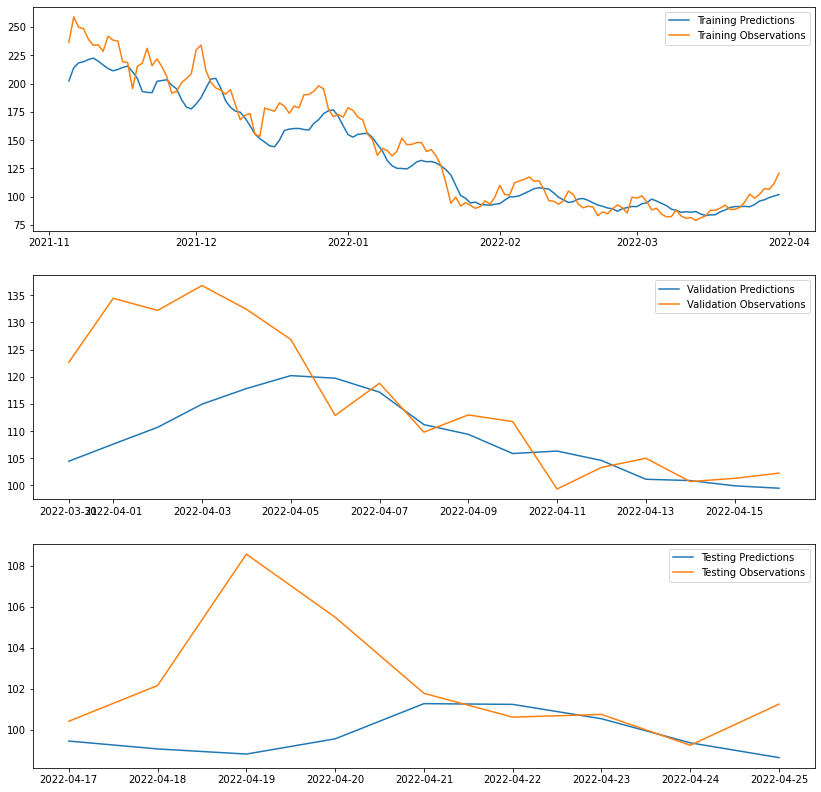

In [22]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [23]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

extra_dates = np.array(['2022-05-09', '2022-05-10', '2022-05-11'])
recursive_dates = np.append(recursive_dates,extra_dates)

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

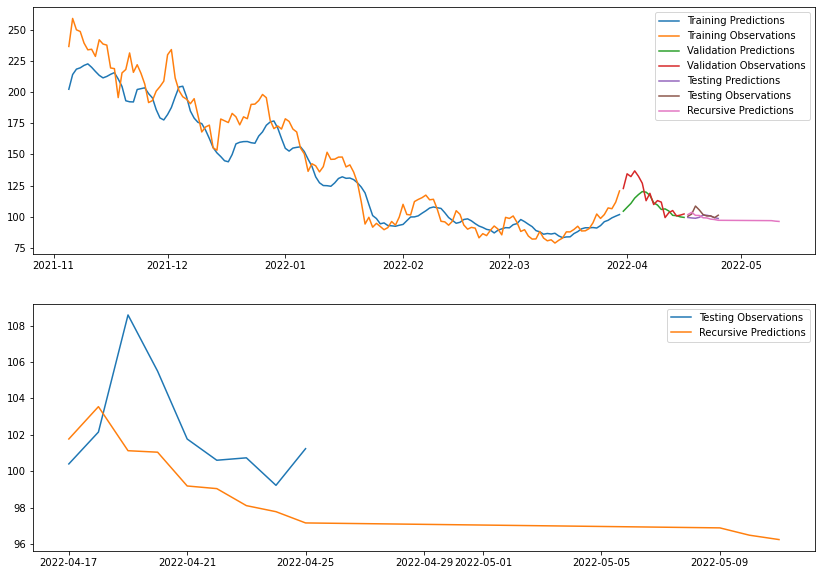

In [24]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [25]:
may_10_prediction = coin_name +'-USD',recursive_predictions[-2][0]
may_10_prediction

('SOL-USD', 96.50073)